In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#!wget -O ML_Regression_Analysis2.csv 'https://1drv.ms/u/s!AgIO0wgSP37tgZl2XY3VFoWaAJOmxw?e=KBEZX9'

In [3]:
# The code was removed by Watson Studio for sharing.

,Project,IncludeInReg,TOTAL,predictor1,predictor2,predictor3,predictor4,predictor5,predictor6,predictor7,predictor8,predictor9,predictor10,FTE
0,IXD,0,0.225,63.3,6.3,31.7,63.3,0.0,31.7,31.7,38.0,6.3,12.7,6.3
1,CF,0,0.300,36.7,0.0,22.0,58.7,0.0,36.7,22.0,22.0,7.3,22.0,7.3
2,TS,0,0.160,30.1,0.0,52.7,52.7,75.3,37.7,22.6,37.7,0.0,7.5,7.5
3,Deployment,0,0.210,34.8,43.5,43.5,34.8,43.5,21.8,43.5,13.1,13.1,8.7,4.4
4,Runtime,0,0.160,20.7,55.2,34.5,55.2,69.0,55.2,55.2,34.5,20.7,0.0,6.9


In [4]:
cdf = df_data[['Project','IncludeInReg', 'TOTAL', 'predictor1','predictor2','predictor3','predictor4','predictor5','predictor6','predictor7','predictor8','predictor9','predictor10']]

#cdf = df_data[['Project','IncludeInReg', 'TOTAL', 'predictor2','predictor3','predictor4','predictor5','predictor6','predictor8','predictor9','predictor10']]


cdf.head()

,Project,IncludeInReg,TOTAL,predictor1,predictor2,predictor3,predictor4,predictor5,predictor6,predictor7,predictor8,predictor9,predictor10
0,IXD,0,0.225,63.3,6.3,31.7,63.3,0.0,31.7,31.7,38.0,6.3,12.7
1,CF,0,0.300,36.7,0.0,22.0,58.7,0.0,36.7,22.0,22.0,7.3,22.0
2,TS,0,0.160,30.1,0.0,52.7,52.7,75.3,37.7,22.6,37.7,0.0,7.5
3,Deployment,0,0.210,34.8,43.5,43.5,34.8,43.5,21.8,43.5,13.1,13.1,8.7
4,Runtime,0,0.160,20.7,55.2,34.5,55.2,69.0,55.2,55.2,34.5,20.7,0.0


In [5]:
cdf_train = cdf.drop('IncludeInReg', axis=1)

cdf_train.head()

#partial train with few predictors
cdf_train_1 = cdf.drop(['IncludeInReg','predictor2','predictor3','predictor4','predictor5','predictor6','predictor7','predictor8','predictor9','predictor10'], axis=1)

cdf_train_1.head()

,Project,TOTAL,predictor1
0,IXD,0.225,63.3
1,CF,0.300,36.7
2,TS,0.160,30.1
3,Deployment,0.210,34.8
4,Runtime,0.160,20.7


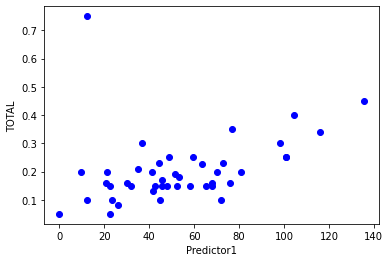

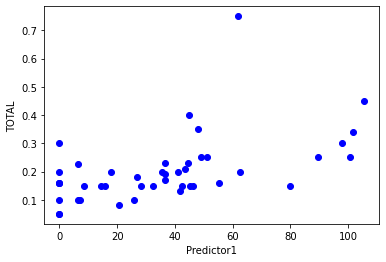

In [6]:
plt.scatter(cdf.predictor1, cdf.TOTAL,  color='blue')
plt.xlabel("Predictor1")
plt.ylabel("TOTAL")
plt.show()

plt.scatter(cdf.predictor2, cdf.TOTAL,  color='blue')
plt.xlabel("Predictor1")
plt.ylabel("TOTAL")
plt.show()

Coefficients:  [[-0.0003805   0.00134694  0.00140868  0.00100439  0.00083946  0.00095282
  -0.00354392  0.00140911  0.00163894  0.00451784]]
Interc:  [0.04399808]


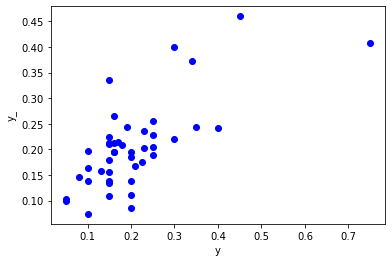

In [26]:
#Full model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(cdf_train[['predictor1','predictor2','predictor3','predictor4','predictor5','predictor6','predictor7','predictor8','predictor9','predictor10']])
y = np.asanyarray(cdf_train[['TOTAL']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Interc: ', regr.intercept_)

y_=regr.predict(x)

y_

plt.scatter(y, y_,  color='blue')
plt.xlabel("y")
plt.ylabel("y_")
plt.show()

In [25]:
y

array([[0.225],
       [0.3  ],
       [0.16 ],
       [0.21 ],
       [0.16 ],
       [0.05 ],
       [0.15 ],
       [0.16 ],
       [0.16 ],
       [0.15 ],
       [0.2  ],
       [0.05 ],
       [0.3  ],
       [0.75 ],
       [0.45 ],
       [0.15 ],
       [0.15 ],
       [0.25 ],
       [0.1  ],
       [0.15 ],
       [0.1  ],
       [0.4  ],
       [0.17 ],
       [0.19 ],
       [0.18 ],
       [0.1  ],
       [0.23 ],
       [0.15 ],
       [0.13 ],
       [0.23 ],
       [0.34 ],
       [0.2  ],
       [0.15 ],
       [0.25 ],
       [0.25 ],
       [0.15 ],
       [0.2  ],
       [0.25 ],
       [0.2  ],
       [0.35 ],
       [0.15 ],
       [0.2  ],
       [0.1  ],
       [0.08 ]])

In [10]:
#Partial model
from sklearn import linear_model
regr_1 = linear_model.LinearRegression()
x_1 = np.asanyarray(cdf_train_1[['predictor1']])
y_1 = np.asanyarray(cdf_train_1[['TOTAL']])
regr_1.fit (x_1, y_1)
# The coefficients
print ('Coefficients: ', regr_1.coef_)
print ('Interc: ', regr_1.intercept_)

Coefficients:  [[0.00138414]]
Interc:  [0.13115636]


In [11]:
#Partial model
from sklearn import linear_model
regr_7 = linear_model.LinearRegression()
x_7 = np.asanyarray(cdf_train[['predictor7']])
y_7 = np.asanyarray(cdf_train[['TOTAL']])
regr_7.fit (x_7, y_7)
# The coefficients
print ('Coefficients: ', regr_7.coef_)
print ('Interc: ', regr_7.intercept_)

Coefficients:  [[0.00161425]]
Interc:  [0.13563847]
